## Data Exploration for Bu-- Major Contracts

### Summary of All files for BU

In [33]:
import os
import fnmatch
import pandas as pd

filepattern = "bu*"
filepath = "/home/rz14/Documents/QR_Qishi/tick2016/bu"
dt_filename = []
for path, dirlist, filelist in os.walk(filepath):
    for filename in fnmatch.filter(filelist,filepattern):
        prod = path.split('/')[-2]
        day_night = path.split('/')[-1]
        contract = filename.split('_')[0]
        date = filename.split('_')[1].split('.')[0]
        dt_filename.append([prod,day_night, contract, date, filename,path])
dt_filename = pd.DataFrame(dt_filename,
                           columns=["product","section","contract","date","filename","path"])
dt_filename.head()


,product,section,contract,date,filename,path
0,bu,day,bu1803,20161017,bu1803_20161017.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day
1,bu,day,bu1612,20160729,bu1612_20160729.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day
2,bu,day,bu1612,20160324,bu1612_20160324.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day
3,bu,day,bu1803,20160329,bu1803_20160329.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day
4,bu,day,bu1809,20161226,bu1809_20161226.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day


In [44]:
import numpy as np
a = np.sort(dt_filename['contract'].unique())
[x.strip('bu') for x in a]

['1601',
 '1602',
 '1603',
 '1604',
 '1605',
 '1606',
 '1607',
 '1608',
 '1609',
 '1610',
 '1611',
 '1612',
 '1701',
 '1702',
 '1703',
 '1704',
 '1705',
 '1706',
 '1709',
 '1712',
 '1803',
 '1806',
 '1809',
 '1812']

In [2]:
dt_file_smry = dt_filename[['section','contract','date']].groupby(['section','contract']).agg(['count','min','max']).reset_index()

dt_file_day = dt_file_smry.loc[dt_file_smry['section'] == 'day'].copy()
dt_file_day.columns = ['section','contract','count_day','FirstDate_day','LastDate_day']
dt_file_day = dt_file_day.drop("section",axis=1)


dt_file_night = dt_file_smry.loc[dt_file_smry['section'] == 'night'].copy()
dt_file_night.columns = ['section','contract','count_night','FirstDate_night','LastDate_night']
dt_file_night = dt_file_night.drop("section",axis=1)

dt_file_smry = pd.merge(dt_file_day,dt_file_night, on="contract")
dt_file_smry

,contract,count_day,FirstDate_day,LastDate_day,count_night,FirstDate_night,LastDate_night
0,bu1601,10,20160104,20160115,9,20160104,20160114
1,bu1602,26,20160104,20160215,25,20160104,20160215
2,bu1603,47,20160104,20160315,45,20160104,20160314
3,bu1604,69,20160104,20160415,66,20160104,20160414
4,bu1605,89,20160104,20160516,85,20160104,20160513
5,bu1606,109,20160104,20160615,104,20160104,20160614
6,bu1607,121,20160118,20160715,117,20160115,20160714
7,bu1608,126,20160216,20160815,123,20160215,20160812
8,bu1609,175,20160104,20160919,170,20160104,20160919
9,bu1610,121,20160418,20161017,117,20160415,20161014


### Get the daily trading volume

In [3]:
# read in the first and last row for each file to calculate the trading volume
# This is not very efficient and will take a while
import csv
dt_filename['volume'] = 0
for i in range(len(dt_filename)):
    if i % 1000 == 0:
        print("reading file #",i)
    filename = dt_filename.iloc[i]["path"]+'/'+dt_filename.iloc[i]["filename"]
    df_temp = pd.read_csv(filename) 
    temp_vol = df_temp.iloc[0]['Volume'] + df_temp.iloc[-1]["AccVolume"]-df_temp.iloc[0]["AccVolume"]
    dt_filename.set_value(i,'volume',temp_vol )
dt_filename.head()

reading file # 0


/home/rz14/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


reading file # 1000
reading file # 2000
reading file # 3000
reading file # 4000
reading file # 5000


,product,section,contract,date,filename,path,volume
0,bu,day,bu1803,20161017,bu1803_20161017.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,8
1,bu,day,bu1612,20160729,bu1612_20160729.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,323988
2,bu,day,bu1612,20160324,bu1612_20160324.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,958
3,bu,day,bu1803,20160329,bu1803_20160329.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,0
4,bu,day,bu1809,20161226,bu1809_20161226.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,216


### Get the top 2 major trading contracts

In [6]:
dt_maj = dt_filename.sort_values(by=['date','section','volume'],ascending=False).groupby(['date','section']).head(2)
dt_maj = dt_maj.sort_values(['date','section'])
# dt_maj['date'] = pd.to_datetime(dt_maj['date'], format='%Y%m%d')
dt_maj.head()
# dt_maj.to_csv('majority_contract.csv',sep='\t')

,product,section,contract,date,filename,path,volume
1305,bu,day,bu1606,20160104,bu1606_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,721264
447,bu,day,bu1601,20160104,bu1601_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,12468
4201,bu,night,bu1606,20160104,bu1606_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/night,339594
3364,bu,night,bu1601,20160104,bu1601_20160104.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/night,2522
778,bu,day,bu1606,20160105,bu1606_20160105.csv,/home/rz14/Documents/QR_Qishi/tick2016/bu/day,483296


In [7]:
dt_maj_smry = dt_maj[['date','section','volume']].groupby(['date','section']).agg({'sum','max'})
dt_maj_smry.columns = dt_maj_smry.columns.droplevel()
dt_maj_smry.reset_index(inplace=True)
day_volume_min = dt_maj_smry[dt_maj_smry.section == 'day']['max'].min()
night_volume_min = dt_maj_smry[dt_maj_smry.section == 'night']['max'].min()
dt_maj_smry.rename(columns={'volume_sum':'volume_top2','volume_max':'volume_top1'},inplace=True)
dt_maj_smry.head()


,date,section,max,sum
0,20160104,day,721264,733732
1,20160104,night,339594,342116
2,20160105,day,483296,485988
3,20160105,night,519948,521444
4,20160106,day,404044,406066


## Plot the top two major trading contracts

#### using the minimum daily trading volume of the most traded contracts as a reference line

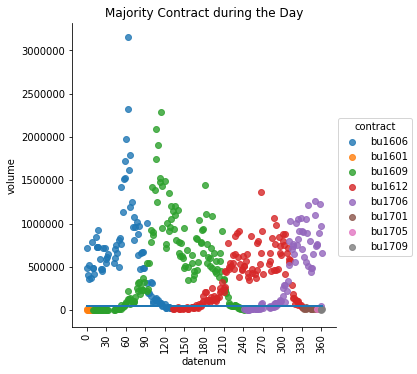

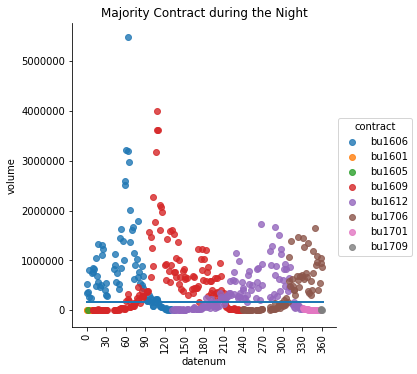

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(30)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(5)

dt_maj['datenum'] = dates.datestr2num(dt_maj['date'])
dt_maj['datenum'] = dt_maj['datenum'] - dt_maj['datenum'].min()

## Plot Day
sns.lmplot('datenum', 'volume', data=dt_maj[dt_maj['section']=='day'], hue='contract', fit_reg=False)
ax = plt.gca()
plt.plot([dt_maj['datenum'].min(),dt_maj['datenum'].max()],[day_volume_min,day_volume_min],linewidth=2)
#plt.plot([dt_maj['date'][0],194512 ], [dt_maj['date'][-1], 194512], linewidth=2)
ax.set_title("Majority Contract during the Day")
ax.xaxis.set_major_locator(majorLocator)
plt.xticks(rotation='vertical')
plt.show()

## Plot night
sns.lmplot('datenum', 'volume', data=dt_maj[dt_maj['section']=='night'], hue='contract', fit_reg=False)
plt.plot([dt_maj['datenum'].min(),dt_maj['datenum'].max()],[night_volume_min,night_volume_min],linewidth=2)
ax = plt.gca()
ax.set_title("Majority Contract during the Night")
ax.xaxis.set_major_locator(majorLocator)
plt.xticks(rotation='vertical')
plt.show()

### Trading volume of the majority contract (top1)

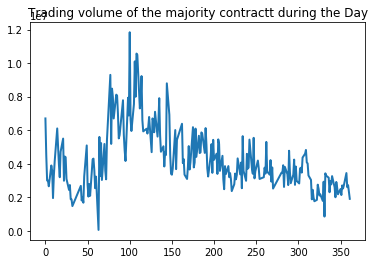

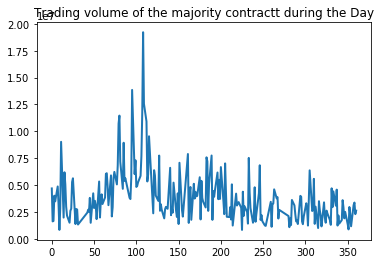

In [7]:

dt_maj_smry['datenum'] = dates.datestr2num(dt_maj_smry['date'])
dt_maj_smry['datenum'] = dt_maj_smry['datenum'] - dt_maj_smry['datenum'].min()

## day
plt.plot(dt_maj_smry[dt_maj_smry['section']=='day']['datenum'],dt_maj_smry[dt_maj_smry['section']=='day']['max'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the majority contractt during the Day")
plt.show()

## night
plt.plot(dt_maj_smry[dt_maj_smry['section']=='night']['datenum'],dt_maj_smry[dt_maj_smry['section']=='night']['max'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the majority contractt during the Day")
plt.show()


### Trading volume of the majority contract (sum of top2)

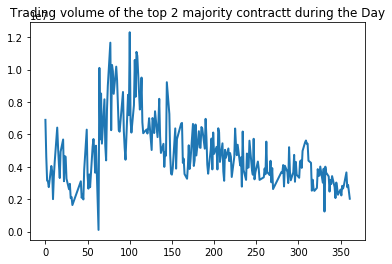

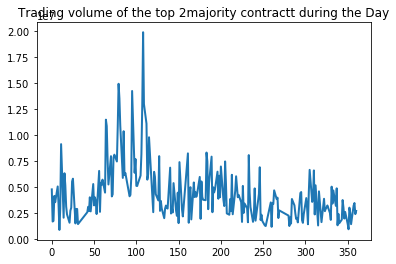

In [8]:
## day
plt.plot(dt_maj_smry[dt_maj_smry['section']=='day']['datenum'],dt_maj_smry[dt_maj_smry['section']=='day']['sum'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the top 2 majority contractt during the Day")
plt.show()

## night
plt.plot(dt_maj_smry[dt_maj_smry['section']=='night']['datenum'],dt_maj_smry[dt_maj_smry['section']=='night']['sum'],linewidth=2)
ax = plt.gca()
ax.set_title("Trading volume of the top 2majority contractt during the Day")
plt.show()
